In [39]:
import requests
import pandas as pd

## Goal
I want to be able to construct a table of team-based gamelogs containing at minimum the following data:

    Used to Gather Season-Average ORTG/DRTG for Correct Season:
    Team Referenced (1)
    Opposing Team (1)
    Date (1)

    Used to Calculate PPP:
    Final Score for Reference Team (1)
    Offensive/Defensive Possessions for Referenced Team (2)
    
    Calculated Columns:
    Reference-Team ORTG (1)
    Opposing Team DRTG (1)
    
    
    Total Columns per Row:
    8
    
This data will be used to regress opposing DRTG against team ORTG for the game (100*(Points/Poss)). League average ORTG/DRTG would be displayed as a horizontal line in the scatterplot ideally. Furthermore, the elasticity of teams would be the coefficient of the linear (or other) regression. Theoretically, if the regression tends to be nonlinear, I ought to be able to linearize the data by applying an inverse function to the regression and return a single-coefficient output.


In [65]:
# Get team information from pbpstats API

url = "https://api.pbpstats.com/get-teams/nba"
response = requests.get(url)
response_json = response.json()
team_list = response_json['teams']
team_list[0:5]

[{'id': '1610612737', 'text': 'ATL'},
 {'id': '1610612751', 'text': 'BKN'},
 {'id': '1610612738', 'text': 'BOS'},
 {'id': '1610612766', 'text': 'CHA'},
 {'id': '1610612741', 'text': 'CHI'}]

In [69]:
team_dict = {item['id']: item['text'] for item in team_list}
team_dict

{'1610612737': 'ATL',
 '1610612751': 'BKN',
 '1610612738': 'BOS',
 '1610612766': 'CHA',
 '1610612741': 'CHI',
 '1610612739': 'CLE',
 '1610612742': 'DAL',
 '1610612743': 'DEN',
 '1610612765': 'DET',
 '1610612744': 'GSW',
 '1610612745': 'HOU',
 '1610612754': 'IND',
 '1610612746': 'LAC',
 '1610612747': 'LAL',
 '1610612763': 'MEM',
 '1610612748': 'MIA',
 '1610612749': 'MIL',
 '1610612750': 'MIN',
 '1610612740': 'NOP',
 '1610612752': 'NYK',
 '1610612760': 'OKC',
 '1610612753': 'ORL',
 '1610612755': 'PHI',
 '1610612756': 'PHX',
 '1610612757': 'POR',
 '1610612758': 'SAC',
 '1610612759': 'SAS',
 '1610612761': 'TOR',
 '1610612762': 'UTA',
 '1610612764': 'WAS'}

In [249]:
# Example API call to collect game log stats for Atlanta Hawks from the 2022-2023 NBA seson 
url = "https://api.pbpstats.com/get-game-logs/nba"
params = {
    "Season": "2022-23", # To get for multiple seasons, separate seasons by comma
    "SeasonType": "Regular Season",
    "EntityId": "1610612737",
    "EntityType": "Team" # Use Opponent to get opponent stats
}
response = requests.get(url, params=params)
response_json = response.json()
totals = response_json['single_row_table_data']
game_logs = response_json['multi_row_table_data']

In [251]:
response_json['multi_row_table_data'][0]

{'Minutes': '48:00',
 'OffPoss': 106,
 'DefPoss': 106,
 'PenaltyOffPoss': 19,
 'PenaltyDefPoss': 10,
 'SecondChanceOffPoss': 6,
 'TotalPoss': 212,
 'AtRimFGM': 15,
 'AtRimFGA': 23,
 'SecondChanceAtRimFGM': 2,
 'SecondChanceAtRimFGA': 3,
 'PenaltyAtRimFGA': 1,
 'ShortMidRangeFGM': 16,
 'ShortMidRangeFGA': 29,
 'LongMidRangeFGM': 7,
 'LongMidRangeFGA': 13,
 'Corner3FGM': 3,
 'Corner3FGA': 8,
 'PenaltyCorner3FGM': 1,
 'PenaltyCorner3FGA': 3,
 'Arc3FGM': 4,
 'Arc3FGA': 17,
 'PenaltyArc3FGA': 3,
 'FG2M': 38,
 'FG2A': 65,
 'FG3M': 7,
 'FG3A': 25,
 'FtPoints': 20,
 'Points': 117,
 'SecondChanceFG2M': 4,
 'SecondChanceFG2A': 5,
 'SecondChancePoints': 8,
 'PenaltyFG2M': 2,
 'PenaltyFG2A': 5,
 'PenaltyFG3M': 1,
 'PenaltyFG3A': 6,
 'PenaltyFtPoints': 8,
 'PenaltyPoints': 15,
 'PtsAssisted2s': 46,
 'PtsUnassisted2s': 30,
 'PtsAssisted3s': 21,
 'PtsPutbacks': 4,
 'NonHeaveArc3FGA': 17,
 'NonHeaveArc3FGM': 4,
 'Fg2aBlocked': 2,
 'Fg3aBlocked': 1,
 'TwoPtAssists': 23,
 'ThreePtAssists': 7,
 'Assists'

In [126]:
final_df = pd.DataFrame(game_logs)
final_df.head()

,Minutes,OffPoss,DefPoss,PenaltyOffPoss,PenaltyDefPoss,SecondChanceOffPoss,TotalPoss,AtRimFGM,AtRimFGA,SecondChanceAtRimFGM,...,PenaltyArc3FGM,Loose Ball Fouls Drawn,BlockedCorner3,PenaltyArc3Accuracy,HeaveAttempts,Charge Fouls,OffensiveGoaltends,Clear Path Fouls,Transition Take Fouls,3SecondViolations
0,48:00,106,106,19,10.0,6,212,15,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48:00,102,100,8,36.0,12,202,18,23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48:00,101,101,21,30.0,15,202,19,30,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48:00,97,98,21,27.0,8,195,19,27,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48:00,97,97,33,32.0,13,194,26,34,4,...,5.0,2.0,1.0,0.625,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
totals['Name']

'ATL'

In [77]:
# Gather the following columns:
# 'Opponent', 'Points', 'Date', 'OffPoss', 'DefPoss'
game_logs[0]

'HOU'

In [79]:
# Now we have an example dataset to build a function to transform the JSON data to a dataframe. Here we will build a 
# draft function to convert data.

test_df = pd.DataFrame(game_logs[0], index=[0])
test_df[['Opponent', 'Points', 'Date', 'OffPoss', 'DefPoss']]

,Opponent,Points,Date,OffPoss,DefPoss
0,HOU,117,2022-10-19,106,106


In [70]:
test_df = test_df.append(game_logs[1], ignore_index=True)
test_df.head()

,Minutes,OffPoss,DefPoss,PenaltyOffPoss,PenaltyDefPoss,SecondChanceOffPoss,TotalPoss,AtRimFGM,AtRimFGA,SecondChanceAtRimFGM,...,SecondChanceCorner3FGM,SecondChanceCorner3Frequency,SecondChanceCorner3PctAssisted,SecondChanceFG3A,SecondChanceFG3M,SecondChanceFg3Pct,SecondChanceFtPoints,SelfOReb,SelfORebPct,Transition Take Fouls Drawn
0,48:00,106,106,19,10,6,212,15,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48:00,102,100,8,36,12,202,18,23,1,...,1.0,0.272727,1.0,4.0,1.0,0.25,2.0,3.0,0.073171,1.0
2,48:00,102,100,8,36,12,202,18,23,1,...,1.0,0.272727,1.0,4.0,1.0,0.25,2.0,3.0,0.073171,1.0


['1610612737',
 '1610612751',
 '1610612738',
 '1610612766',
 '1610612741',
 '1610612739',
 '1610612742',
 '1610612743',
 '1610612765',
 '1610612744',
 '1610612745',
 '1610612754',
 '1610612746',
 '1610612747',
 '1610612763',
 '1610612748',
 '1610612749',
 '1610612750',
 '1610612740',
 '1610612752',
 '1610612760',
 '1610612753',
 '1610612755',
 '1610612756',
 '1610612757',
 '1610612758',
 '1610612759',
 '1610612761',
 '1610612762',
 '1610612764']

In [298]:
def build_gamelog_df(seasons, season_type, team_keys):
    
    """
    Uses pbpstats API to gather data to build team-wise gamelog stats for a given season
    """
    final_df = pd.DataFrame()
    # counter = 0
    for team_id in team_keys:
        # counter += 1
        # print(counter)

        # Builds API call for given team's game logs and season stats
        url = "https://api.pbpstats.com/get-game-logs/nba"
        params = {
            "Season": seasons, # To get for multiple seasons, separate seasons by comma
            "SeasonType": season_type,
            "EntityId": team_id,
            "EntityType": "Team" # Use Opponent to get opponent stats
            }
        response = requests.get(url, params=params)
        response_json = response.json()
        team_name = response_json['single_row_table_data']['Name'] # Gets team name from season totals
        game_logs = response_json['multi_row_table_data'] # Gets all game log data (insanely large)
        
        team_game_log_df = pd.DataFrame(game_logs) # Assigns game log data to a df
        team_game_log_df['Team Name'] = team_name # Adds name column to team game log data
        
        # ADDITIONAL FEATURES ADDED HERE. IF STUFF BREAKS HASH THIS OUT
        
        # Converts date to datetime col
        team_game_log_df['Date'] = pd.to_datetime(team_game_log_df['Date'])
        
        #Sorts values by date
        team_game_log_df.sort_values('Date', inplace=True)
        team_game_log_df['Game_Number'] = team_game_log_df.index + 1
        
        """
        # Deprecated debugging tool
        print(final_df.empty)
        """
        
        if final_df.empty:
            final_df = team_game_log_df
        else:
            # print('This step was encountered') # Deprecated debugging tool
            final_df = pd.concat([final_df, team_game_log_df], axis=0)
        """
        # Debug Tool
        if counter >= 2 and final_df.shape[0] == 82:
            print("is broke")
            return None
        """
    return final_df

# Debug Checks performed:
"""
0. Confirmed that multiple iterations of the loop were being reached. Confirmed 30 total iterations.
1. Confirmed that team_name and game_log values are correctly received in each iteration of get request
2. Confirmed that final_df was missing data as soon as the 2nd iteration (team_name = "BKN")
"""

'\n0. Confirmed that multiple iterations of the loop were being reached. Confirmed 30 total iterations.\n1. Confirmed that team_name and game_log values are correctly received in each iteration of get request\n2. Confirmed that final_df was missing data as soon as the 2nd iteration (team_name = "BKN")\n'

In [299]:
gamelog_df_22_23_RS = build_gamelog_df("2022-23", "Regular Season", list(team_dict.keys()))

In [300]:
analysis_logs = gamelog_df_22_23_RS.copy()

Data Acquisition is complete. Now, we need to format the data such that it is usable and isolate the portions of data we actually desire. First, let's format it well such that it is usable for projects beyond the current considerations.

# Desired Changes:
1. Set "Team Name" as 1st column other than index. Don't set as index so that it behaves correctly on filters.
2. Set datatypes of columns that need altered. Check and convert data types. For now, only alter a column if it's automatic or within the immediate target dataset.

In [301]:
# Changes column order for sanity purposes
analysis_logs = \
                    analysis_logs[['Team Name'] + [col for col in analysis_logs.columns if col != 'Team Name']]

In [302]:
# Converts 'Date' to datetime object
analysis_logs['Date'] = pd.to_datetime(analysis_logs['Date'])

# Converts 'Opponent' to string
analysis_logs['Opponent'] = analysis_logs['Opponent'].astype(str)

In [303]:
# Check dtypes of elasticity vars. Instantiate list of elasticity vars
elasticity_vars = ['Opponent', 'Points', 'Date', 'OffPoss', 'DefPoss']
gamelog_df_22_23_RS[elasticity_vars].dtypes

Opponent            object
Points               int64
Date        datetime64[ns]
OffPoss              int64
DefPoss              int64
dtype: object

In [304]:
# Merge rows based on the conditions
merged_analysis_log = pd.merge(analysis_logs, analysis_logs, left_on=['Team Name', 'Opponent', 'Date'],
                     right_on=['Opponent', 'Team Name', 'Date'], suffixes=('_Base', '_Opp'))

# Drop unnecessary columns
merged_analysis_log = merged_analysis_log.drop(columns=['Team Name_Opp', 'Opponent_Opp'])

In [306]:
# Creates a net rating column
merged_analysis_log['Net_Rating_Base'] = 100*(merged_analysis_log['Points_Base']/merged_analysis_log['OffPoss_Base'] - \
                                              merged_analysis_log['Points_Opp']/merged_analysis_log['OffPoss_Opp'])
merged_analysis_log[
    ['Game_Number_Base',
     'Team Name_Base',
     'Opponent_Base', 
     'Date', 
     'Points_Base', 
     'Points_Opp', 
     'OffPoss_Base',
     'OffPoss_Opp',
     'Net_Rating_Base']
]

,Game_Number_Base,Team Name_Base,Opponent_Base,Date,Points_Base,Points_Opp,OffPoss_Base,OffPoss_Opp,Net_Rating_Base
0,1,ATL,HOU,2022-10-19,117,107,106,106,9.433962
1,2,ATL,ORL,2022-10-21,108,98,102,100,7.882353
2,3,ATL,CHA,2022-10-23,109,126,101,101,-16.831683
3,4,ATL,DET,2022-10-26,118,113,97,98,6.343362
4,5,ATL,DET,2022-10-28,136,112,97,97,24.742268
...,...,...,...,...,...,...,...,...,...
2455,78,WAS,NYK,2023-04-02,109,118,99,99,-9.090909
2456,79,WAS,MIL,2023-04-04,128,140,107,109,-8.814199
2457,80,WAS,ATL,2023-04-05,116,134,105,105,-17.142857
2458,81,WAS,MIA,2023-04-07,114,108,103,104,6.833458


In [310]:
# Creates a 10 game rolling average net rating column
merged_analysis_log['Rolling_Net_Rating'] = \
merged_analysis_log.groupby('Team Name_Base')['Net_Rating_Base'].\
rolling(window=10, min_periods=1).mean().reset_index(level=0, drop=True)

In [311]:
merged_analysis_log['Rolling_Net_Rating']

0       9.433962
1       8.658158
2       0.161544
3       1.706999
4       6.314052
          ...   
2455   -4.105766
2456   -7.223468
2457   -6.282612
2458   -4.049071
2459   -3.311944
Name: Rolling_Net_Rating, Length: 2460, dtype: float64

# Preliminary Analysis
Let's just look at some stuff 'cause this data is robust and kinda awesome

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Game_Number_Base', ylabel='Rolling_Net_Rating'>

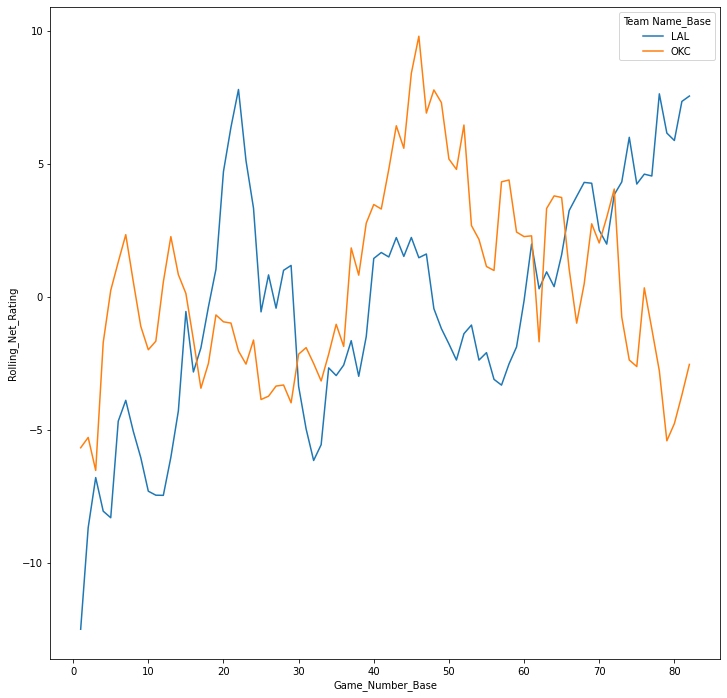

In [325]:
plt.figure(figsize=(12,12))
sns.lineplot(data=\
             merged_analysis_log[merged_analysis_log['Team Name_Base'].isin(['LAL', 'OKC'])],
             x='Game_Number_Base', y='Rolling_Net_Rating',
             hue='Team Name_Base')